In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [3]:
# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("mouse_drug_data.csv")
clinical_trial = pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug, how='left', on="Mouse ID")

# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [4]:
#Description of combined dataset:
mouse_clinical_combine.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_clinical_combine_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

mouse_clinical_combine_mean



Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [6]:
# Convert to DataFrame
mouse_clinical_combine_mean = pd.DataFrame(mouse_clinical_combine_mean)
mouse_clinical_combine_mean.reset_index(level = None, inplace = True)


# Preview DataFrame

mouse_clinical_combine_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mouse_clinical_combine_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
mouse_clinical_combine_sem



Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Ceftamin   0            0.000000
           5            0.164505
           10           0.236144
           15           0.332053
           20           0.359482
           25           0.439356
           30           0.490620
           35           0.692248
           40           0.708505
           45           0.902358
Infubinol  0            0.000000
           5            0.235102
           10           0.282346
           15           0.357705
           20           0.476210
           25           0.550315
           30           0.631061
           35           0.984155
           40           1.055220
           45         

In [8]:
# Convert to DataFrame (SEM)
mouse_clinical_combine_sem = pd.DataFrame(mouse_clinical_combine_sem)

# Preview DataFrame (SEM)
mouse_clinical_combine_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

# Data Munging

In [9]:
# Minor Data Munging to Re-Format the Data Frames

#MEAN RE-FORMATTED
mouse_clinical_combine_mean = mouse_clinical_combine_mean.reset_index()
mouse_clinical_combine_mean_pivot = mouse_clinical_combine_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

mouse_clinical_combine_mean_pivot.head()





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [10]:
#SEM RE-FORMATTED

mouse_clinical_combine_sem = mouse_clinical_combine_sem.reset_index()
mouse_clinical_combine_sem_pivot = mouse_clinical_combine_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked


mouse_clinical_combine_sem_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


# Tumor Response to Treatment Plot

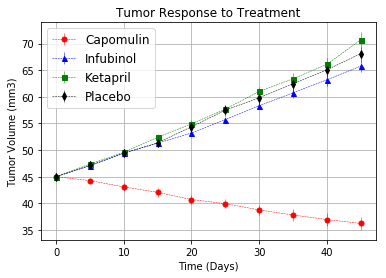

In [11]:
# Generate the Plot (with Error Bars)
    #Capomulin
plt.errorbar(mouse_clinical_combine_mean_pivot.index, mouse_clinical_combine_mean_pivot["Capomulin"], yerr=mouse_clinical_combine_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
    #Infubinol
plt.errorbar(mouse_clinical_combine_mean_pivot.index, mouse_clinical_combine_mean_pivot["Infubinol"], yerr=mouse_clinical_combine_sem_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
    #Ketapril
plt.errorbar(mouse_clinical_combine_mean_pivot.index, mouse_clinical_combine_mean_pivot["Ketapril"], yerr=mouse_clinical_combine_sem_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
    #Placebo
plt.errorbar(mouse_clinical_combine_mean_pivot.index, mouse_clinical_combine_mean_pivot["Placebo"], yerr=mouse_clinical_combine_sem_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
    
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)  #(larger font is way easier to read)
    
# Save the Figure
plt.savefig("tumortreatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mouse_clinical_combine_mean_met = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
mouse_clinical_combine_mean_met




Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
           25           1.500000
           30           1.937500
           35           2.071429
           40           2.357143
           45           2.692308
Infubinol  0            0.000000
           5            0.280000
           10           0.666667
           15           0.904762
           20           1.050000
           25           1.277778
           30           1.588235
           35           1.666667
           40           2.100000
           45         

In [13]:
# Convert to DataFrame #(MEAN)
mouse_clinical_combine_mean_met = pd.DataFrame(mouse_clinical_combine_mean_met)["Metastatic Sites"]

# Preview DataFrame
mouse_clinical_combine_mean_met.head()



Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mouse_clinical_combine_sem_met = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
mouse_clinical_combine_sem_met


# Convert to DataFrame
mouse_clinical_combine_sem_met = pd.DataFrame(mouse_clinical_combine_sem_met)


# Preview DataFrame
mouse_clinical_combine_sem_met.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
# Minor Data Munging to Re-Format the Data Frames
mouse_clinical_combine_mean_met = mouse_clinical_combine_mean_met.reset_index()
mouse_clinical_combine_mean_met_pivot = mouse_clinical_combine_mean_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



mouse_clinical_combine_mean_met_pivot.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [24]:
mouse_clinical_combine_sem_met = mouse_clinical_combine_sem_met.reset_index()
mouse_clinical_combine_sem_met_pivot = mouse_clinical_combine_sem_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]



# Preview that Reformatting worked
mouse_clinical_combine_sem_met_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


# Metastatic Response to Treatment: Plot

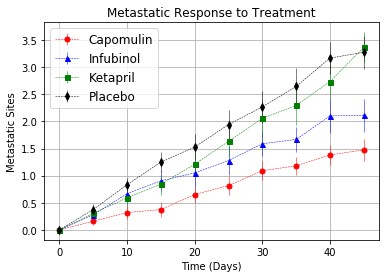

In [25]:
# Generate the Plot (with Error Bars)
    #Capomulin
plt.errorbar(mouse_clinical_combine_mean_met_pivot.index, mouse_clinical_combine_mean_met_pivot["Capomulin"], yerr=mouse_clinical_combine_sem_met_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
    #Infubinol
plt.errorbar(mouse_clinical_combine_mean_met_pivot.index, mouse_clinical_combine_mean_met_pivot["Infubinol"], yerr=mouse_clinical_combine_sem_met_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
    #Ketapril
plt.errorbar(mouse_clinical_combine_mean_met_pivot.index, mouse_clinical_combine_mean_met_pivot["Ketapril"], yerr=mouse_clinical_combine_sem_met_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
    #Placebo
plt.errorbar(mouse_clinical_combine_mean_met_pivot.index, mouse_clinical_combine_mean_met_pivot["Placebo"], yerr=mouse_clinical_combine_sem_met_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
    
plt.title("Metastatic Response to Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="best", fontsize="large", fancybox=True)
    
# Save the Figure
plt.savefig("Metastatic_Sites.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mouse_clinical_combine.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]


# Convert to DataFrame

survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame

survival_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [27]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


# Survival During Testing Plot

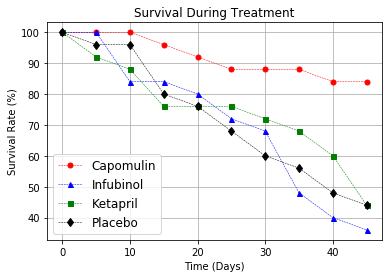

In [28]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Save the Figure
plt.savefig("survivalrates.png")

# Show the Figure
plt.show()

In [29]:
# Calculate the percent changes for each drug
percent_change = 100* (mouse_clinical_combine_mean_pivot.iloc[-1] - mouse_clinical_combine_mean_pivot.iloc[0]) / mouse_clinical_combine_mean_pivot.iloc[0]



# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

# Tumor Change Over 45 Day Treatment

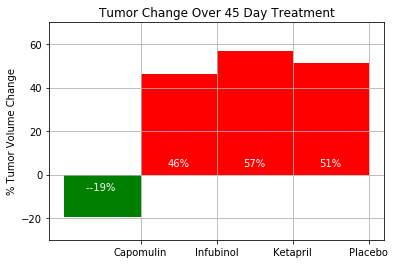

In [30]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (percent_change["Capomulin"], 
                  percent_change["Infubinol"], 
                  percent_change["Ketapril"], 
                  percent_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_change))  
width = 1
#
rectsPass = ax.bar(ind[0], percent_change[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid()


# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("TumorChange.png")

# Show the Figure
fig.show()

# Three Observable Trends 

In [31]:
##############################################

#1. When comparing the 3 requested drugs + the placebo, the most successful drug was Capomulin, as there was about a 19% decrease in tumor size. 
### Capomulin also performs better than the other 3 drugs in all aspects in the study. 
#2. Of the 4, the mice administered Capomulin had a higher survival rate. 
#3. Of the 4, the mice administered Capomulin show less evidence of metastatic sites (less spread of cancerous tumors)

##############################################
